In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rides_df=pd.read_csv('cab_rides.csv')
rides_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
weather_df=pd.read_csv('weather.csv')
weather_df.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [4]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [6]:
rides_df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [7]:
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [8]:
weather_df=weather_df.fillna(0)

In [9]:
rides_df['date']=pd.to_datetime(rides_df['time_stamp']/ 1000,unit='s')

weather_df['date']=pd.to_datetime(weather_df['time_stamp'],unit='s')


In [10]:
rides_df['merge_date'] = rides_df['source'].astype(str) +" - "+ rides_df['date'].dt.date.astype("str") +" - "+ rides_df['date'].dt.hour.astype("str")
weather_df['merge_date'] = weather_df['location'].astype(str) +" - "+ weather_df['date'].dt.date.astype("str") +" - "+ weather_df['date'].dt.hour.astype("str")

In [11]:
weather_df.index = weather_df['merge_date']
df_joined = rides_df.join(weather_df,on=['merge_date'],rsuffix ='_w')

In [12]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268639 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1268639 non-null  float64       
 1   cab_type          1268639 non-null  object        
 2   time_stamp        1268639 non-null  int64         
 3   destination       1268639 non-null  object        
 4   source            1268639 non-null  object        
 5   price             1167730 non-null  float64       
 6   surge_multiplier  1268639 non-null  float64       
 7   id                1268639 non-null  object        
 8   product_id        1268639 non-null  object        
 9   name              1268639 non-null  object        
 10  date              1268639 non-null  datetime64[ns]
 11  merge_date        1268639 non-null  object        
 12  temp              1265675 non-null  float64       
 13  location          1265675 non-null  object 

In [13]:
df_joined['id'].value_counts()

c45958b4-a0a6-448c-953d-566e32fe71a8    15
698b41ee-f93f-49ac-bc55-b15cd8edc103    15
cfb96d23-77b9-47ba-9d7f-7fcc3da0d0fb    15
bb08851f-0888-4ba7-a127-159e7b2d3070    15
f5161479-f8a2-4d5c-91b7-fed0a3ce5d91    15
                                        ..
076c2d40-3533-4805-98b8-ade60c8fcc65     1
b9551481-26b1-48f8-a24f-03ec15ee31eb     1
416a9117-a9a7-43b5-8faa-a2bedc4a543b     1
efd9cdf3-0a81-40d3-8faf-74a451f7f1df     1
7be0bf2f-983e-45c4-bd49-a6eec6594689     1
Name: id, Length: 693071, dtype: int64

In [14]:
df_joined[df_joined['id']=='6fa6c718-15cf-48a0-aa4f-49efa5d6974e'].iloc[:,10:22]

,date,merge_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_w,merge_date_w
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.41,West End,1.00,1014.19,0.0,1.543213e+09,0.92,1.22,2018-11-26 06:15:44,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.41,West End,1.00,1014.18,0.0,1.543213e+09,0.92,1.24,2018-11-26 06:16:45,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.39,West End,1.00,1014.19,0.0,1.543213e+09,0.92,1.18,2018-11-26 06:12:14,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.46,West End,1.00,1014.18,0.0,1.543213e+09,0.92,1.34,2018-11-26 06:24:04,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,41.07,West End,0.98,1014.35,0.0,1.543215e+09,0.92,1.80,2018-11-26 06:49:04,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.48,West End,1.00,1014.18,0.0,1.543214e+09,0.92,1.41,2018-11-26 06:29:03,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,41.07,West End,0.98,1014.35,0.0,1.543215e+09,0.92,1.81,2018-11-26 06:50:30,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.42,West End,1.00,1014.18,0.0,1.543213e+09,0.92,1.23,2018-11-26 06:16:15,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.41,West End,1.00,1014.19,0.0,1.543213e+09,0.92,1.22,2018-11-26 06:15:16,West End - 2018-11-26 - 6
65352,2018-11-26 06:27:02.700000048,West End - 2018-11-26 - 6,40.40,West End,1.00,1014.19,0.0,1.543213e+09,0.92,1.21,2018-11-26 06:14:45,West End - 2018-11-26 - 6


In [15]:
id_group = pd.DataFrame(df_joined.groupby('id')['temp','clouds','pressure','rain','humidity','wind'].mean())
df_rides_weather=rides_df.join(id_group,on = ['id'])

C:\Users\motur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [16]:
df_rides_weather['Month']=df_rides_weather['date'].dt.month
df_rides_weather['Hour']=df_rides_weather['date'].dt.hour
df_rides_weather['Day']=df_rides_weather['date'].dt.strftime('%A')
df_rides_weather.tail(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,merge_date,temp,clouds,pressure,rain,humidity,wind,Month,Hour,Day
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0,0.76,2.51,12,23,Saturday
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0,0.76,2.51,12,23,Saturday
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0,0.76,2.51,12,23,Saturday
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0,0.76,2.51,12,23,Saturday
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0,0.76,2.51,12,23,Saturday


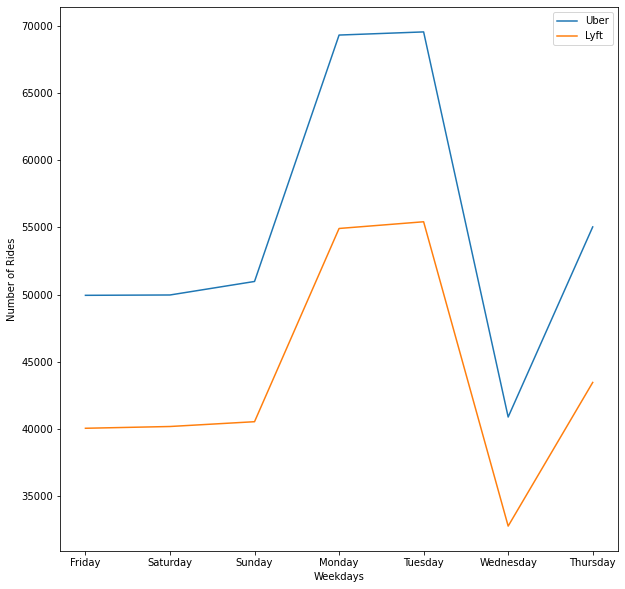

In [17]:
import matplotlib.pyplot as plt
uber_day_count =df_rides_weather[df_rides_weather['cab_type']=='Uber']['Day'].value_counts()
uber_day_count=uber_day_count.reindex(index = ['Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday'])
lyft_day_count =df_rides_weather[df_rides_weather['cab_type']=='Lyft']['Day'].value_counts()
lyft_day_count=lyft_day_count.reindex(index = ['Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday'])

fig , ax = plt.subplots(figsize = (10,10))
ax.plot(uber_day_count.index, uber_day_count,label='Uber')
ax.plot(lyft_day_count.index, lyft_day_count,label='Lyft')
ax.set(ylabel = 'Number of Rides',xlabel = 'Weekdays')
ax.legend()
plt.show()

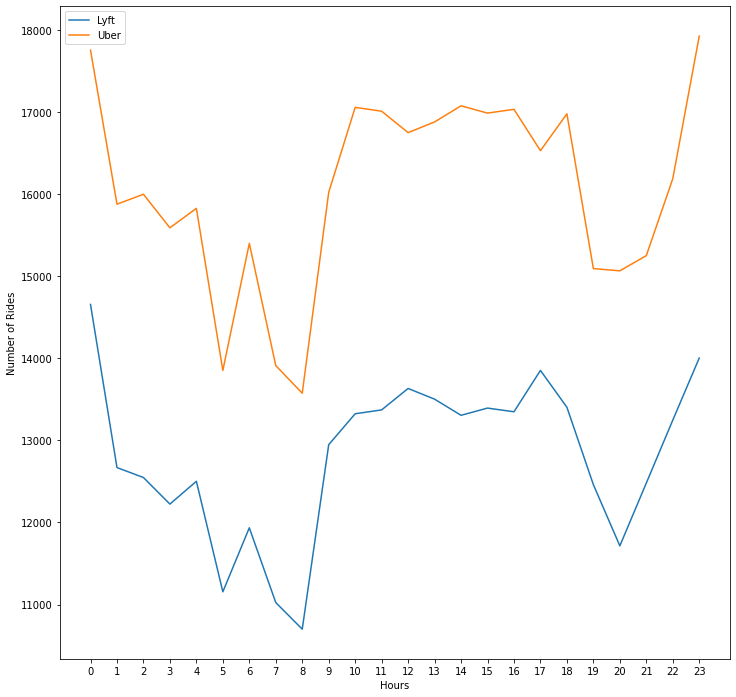

In [18]:
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()

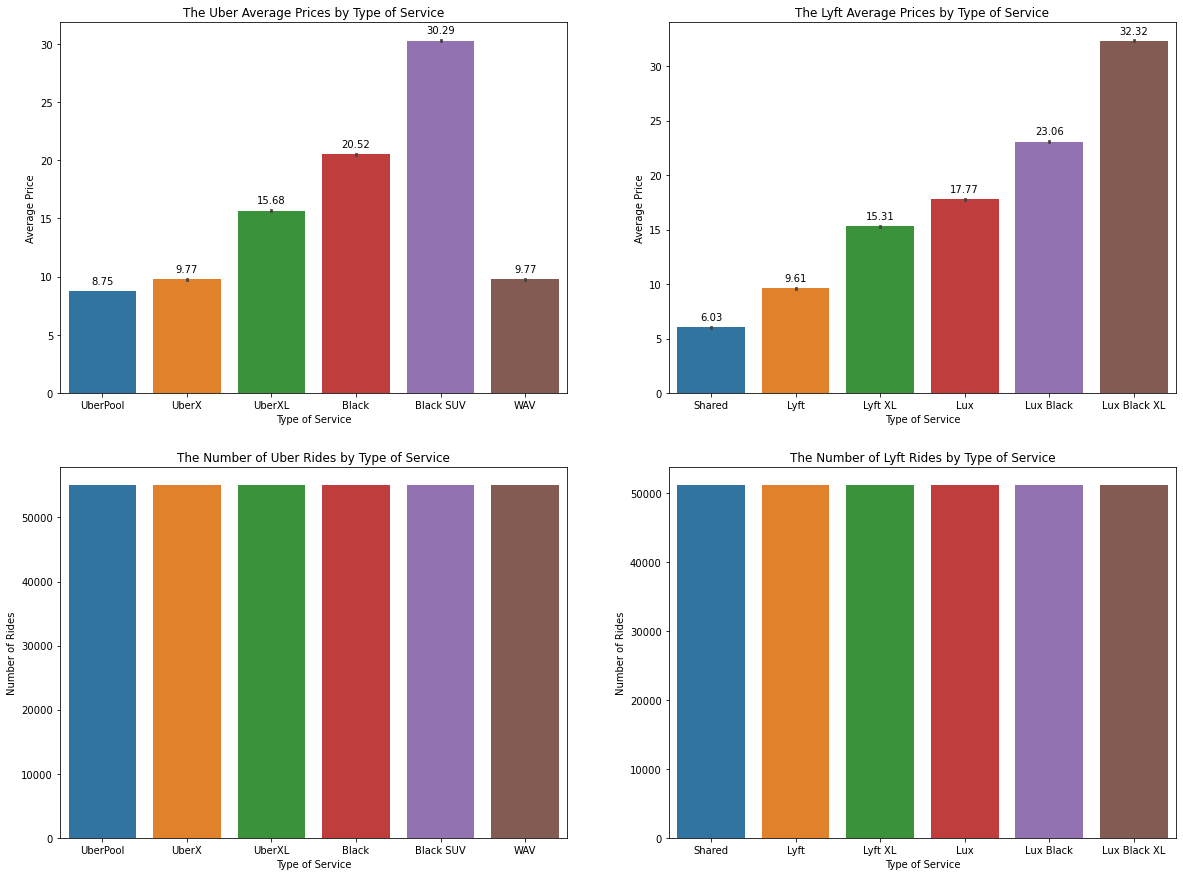

In [19]:
uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']
fig, ax = plt.subplots(2,2, figsize = (20,15))
ax1 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].price , ax = ax[0,0], order = uber_order)
ax2 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].price , ax = ax[0,1], order = lyft_order)
ax3 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[1,0] ,order = uber_order)
ax4 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1,1],order = lyft_order)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax3.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax4.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')
ax3.set_title('The Number of Uber Rides by Type of Service')
ax4.set_title('The Number of Lyft Rides by Type of Service')
plt.show()

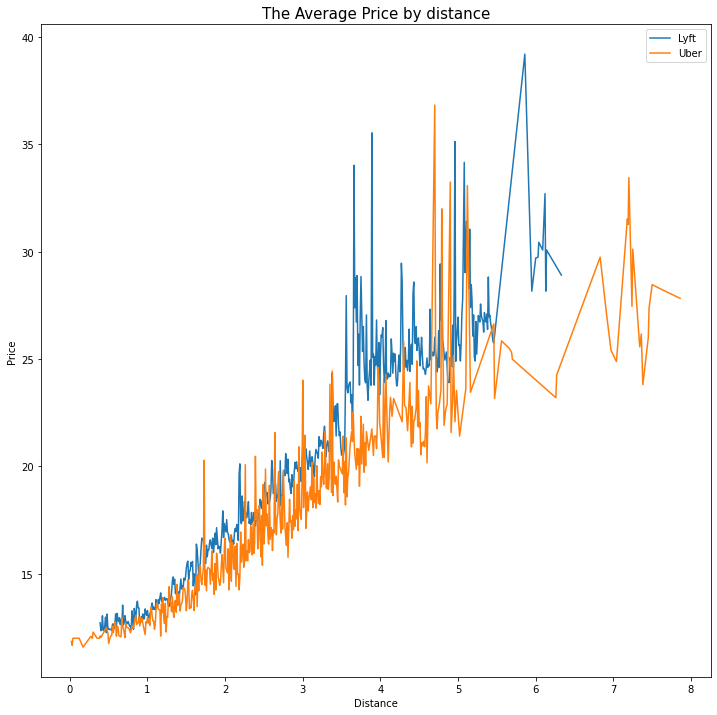

In [20]:
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price by distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()

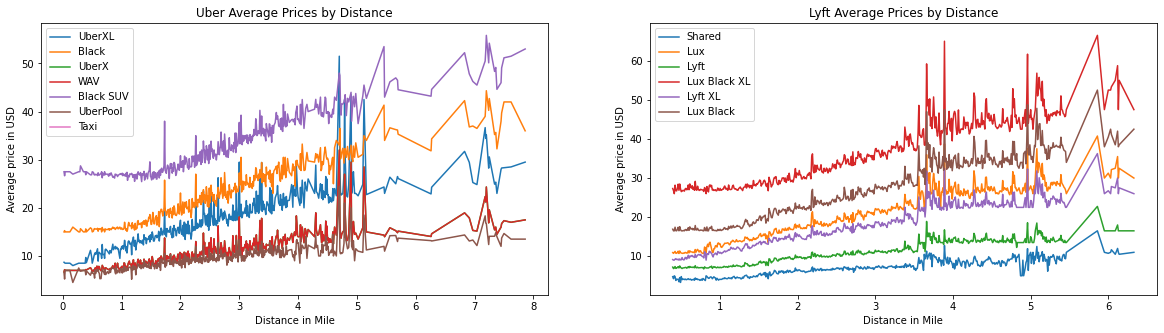

In [21]:
fig, ax = plt.subplots(1,2 , figsize = (20,5))
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['name'].unique()):
    ax[0].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['name'].unique()):
    ax[1].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()

In [22]:
rides_df=rides_df.drop('merge_date',axis=1)
rides_df=rides_df.drop('date',axis=1)
weather_df=weather_df.drop('merge_date',axis=1)
weather_df=weather_df.drop('date',axis=1)


In [23]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
merge_date,,,,,,,,
Back Bay - 2018-12-16 - 23,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
Beacon Hill - 2018-12-16 - 23,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
Boston University - 2018-12-16 - 23,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
Fenway - 2018-12-16 - 23,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
Financial District - 2018-12-16 - 23,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
North Station - 2018-12-03 - 6,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
Northeastern University - 2018-12-03 - 6,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
South Station - 2018-12-03 - 6,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54


In [24]:
weather_df.groupby('location').mean()

avg_weather_df = weather_df.groupby('location').mean().reset_index(drop=False)
avg_weather_df = avg_weather_df.drop('time_stamp', axis=1)

source_weather_df= avg_weather_df.rename(columns={'location':'source','temp':'source_temp','clouds':'source_clouds','pressure':'source_pressure','rain':'source_rain','hummidity':'source_hummidity','wind':'source_wind'})
source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [25]:
destination_weather_df = avg_weather_df.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [26]:
data = rides_df\
    .merge(source_weather_df, on='source')\
    .merge(destination_weather_df, on='destination')

data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
693067,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
693068,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
693069,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [27]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['cab_type', 'destination', 'source', 'id', 'product_id', 'name'],
      dtype=object)

In [28]:
from collections import Counter
for i in cat:
    print('Coulum : ',i)
    print('Count of classes : ',data[i].nunique())
    print(Counter(data[i]))
    print('*'*80)

Coulum :  cab_type
Count of classes :  2
Counter({'Uber': 385663, 'Lyft': 307408})
********************************************************************************
Coulum :  destination
Count of classes :  12
Counter({'Financial District': 58851, 'Theatre District': 57798, 'Back Bay': 57780, 'Boston University': 57764, 'Haymarket Square': 57764, 'Fenway': 57757, 'North End': 57756, 'Northeastern University': 57755, 'South Station': 57749, 'West End': 57575, 'Beacon Hill': 57403, 'North Station': 57119})
********************************************************************************
Coulum :  source
Count of classes :  12
Counter({'Financial District': 58857, 'Theatre District': 57813, 'Back Bay': 57792, 'Boston University': 57764, 'North End': 57763, 'Fenway': 57757, 'Northeastern University': 57756, 'South Station': 57750, 'Haymarket Square': 57736, 'West End': 57562, 'Beacon Hill': 57403, 'North Station': 57118})
**********************************************************************

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'WAV': 55096, 'Black SUV': 55096, 'UberXL': 55096, 'Black': 55095, 'Taxi': 55095, 'UberX': 55094, 'UberPool': 55091, 'Lux': 51235, 'Lyft': 51235, 'Lux Black XL': 51235, 'Lyft XL': 51235, 'Lux Black': 51235, 'Shared': 51233})
********************************************************************************


In [29]:
data.dtypes[data.dtypes!='O'].index.values

array(['distance', 'time_stamp', 'price', 'surge_multiplier',
       'source_temp', 'source_clouds', 'source_pressure', 'source_rain',
       'humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind'], dtype=object)

In [30]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder
x="*"
for i in cat:
    print("LABEL ENCODING OF : ",i)
    LE=LabelEncoder()
    print(Counter(data[i]))
    data[i]=LE.fit_transform(data[i])
    print(Counter(data[i]))
    print('*'*80)

LABEL ENCODING OF :  cab_type
Counter({'Uber': 385663, 'Lyft': 307408})
Counter({1: 385663, 0: 307408})
********************************************************************************
LABEL ENCODING OF :  destination
Counter({'Financial District': 58851, 'Theatre District': 57798, 'Back Bay': 57780, 'Boston University': 57764, 'Haymarket Square': 57764, 'Fenway': 57757, 'North End': 57756, 'Northeastern University': 57755, 'South Station': 57749, 'West End': 57575, 'Beacon Hill': 57403, 'North Station': 57119})
Counter({4: 58851, 10: 57798, 0: 57780, 2: 57764, 5: 57764, 3: 57757, 6: 57756, 8: 57755, 9: 57749, 11: 57575, 1: 57403, 7: 57119})
********************************************************************************
LABEL ENCODING OF :  source
Counter({'Financial District': 58857, 'Theatre District': 57813, 'Back Bay': 57792, 'Boston University': 57764, 'North End': 57763, 'Fenway': 57757, 'Northeastern University': 57756, 'South Station': 57750, 'Haymarket Square': 57736, 'West E

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({6: 55096, 2: 55096, 3: 55096, 1: 55095, 4: 55095, 0: 55094, 5: 55091, 12: 51235, 7: 51235, 10: 51235, 11: 51235, 9: 51235, 8: 51233})
********************************************************************************
LABEL ENCODING OF :  name
Counter({'WAV': 55096, 'Black SUV': 55096, 'UberXL': 55096, 'Black': 55095, 'Taxi': 55095, 'UberX': 55094, 'UberPool': 55091, 'Lux': 51235, 'Lyft': 51235, 'Lux Black XL': 51235, 'Lyft XL': 51235, 'Lux Black': 51235, 'Shared': 51233})
Counter({12: 55096, 1: 55096, 11: 55096, 0: 55095, 8: 55095, 10: 55094, 9: 55091, 2: 51235, 5: 51235, 4: 51235, 6: 51235, 3: 51235, 7: 51233})
********************************************************************************


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance              693071 non-null  float64
 1   cab_type              693071 non-null  int32  
 2   time_stamp            693071 non-null  int64  
 3   destination           693071 non-null  int32  
 4   source                693071 non-null  int32  
 5   price                 637976 non-null  float64
 6   surge_multiplier      693071 non-null  float64
 7   id                    693071 non-null  int32  
 8   product_id            693071 non-null  int32  
 9   name                  693071 non-null  int32  
 10  source_temp           693071 non-null  float64
 11  source_clouds         693071 non-null  float64
 12  source_pressure       693071 non-null  float64
 13  source_rain           693071 non-null  float64
 14  humidity              693071 non-null  float64
 15  

In [32]:

data['price'] = data['price'].fillna(value=data["price"].mean())

x=data.drop(['price','distance','time_stamp','surge_multiplier','source_temp','id','source_clouds','source_pressure','source_rain','humidity','source_wind','destination_temp','destination_clouds','destination_pressure','destination_rain','destination_humidity','destination_wind'],axis=1)
x=pd.DataFrame(x)

y=data['price']
y=pd.DataFrame(y)

In [33]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te= train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)
print(x_tr.shape)
print(x_te.shape)

(485149, 5)
(207922, 5)


In [34]:
x_tr.describe()

,cab_type,destination,source,product_id,name
count,485149.000000,485149.000000,485149.000000,485149.000000,485149.000000
mean,0.556559,5.502656,5.494817,5.879777,6.046697
std,0.496791,3.450493,3.449483,3.734381,3.780554
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,5.000000,5.000000,6.000000,6.000000
75%,1.000000,9.000000,8.000000,9.000000,9.000000
max,1.000000,11.000000,11.000000,12.000000,12.000000


In [35]:
from sklearn.ensemble import RandomForestRegressor
import random
rand=RandomForestRegressor(n_estimators=20,random_state=42,n_jobs=-1,max_depth=5)
random.seed('42')
rand.fit(x_tr,y_tr)


C:\Users\motur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(max_depth=5, n_estimators=20, n_jobs=-1, random_state=42)

In [36]:
y_pred = rand.predict(x_te)
print(y_pred)

[ 9.847539    9.847539   23.04335934 ...  8.91646193 13.49799373
 19.62994181]


In [37]:
from sklearn.metrics import r2_score
print((r2_score(y_te,y_pred)).round(2))

0.79


In [38]:
pred=rand.predict([['0.556559','3.000000','5.879777','5.000000','9.000000']])
print(pred.round(2))

[9.56]


In [39]:
import pickle
pickle.dump(rand,open("model.pkl","wb"))